[Reference about the problem](https://towardsdatascience.com/mobile-ads-click-through-rate-ctr-prediction-44fdac40c6ff)

[Hashing Trick](https://booking.ai/dont-be-tricked-by-the-hashing-trick-192a6aae3087)

[Factorization](https://medium.com/@vinitvssingh5/explaining-the-field-aware-factorization-machines-ffms-for-ctr-prediction-2e98b2949dd6)

[Discussion around FFM Kaggle](https://www.kaggle.com/competitions/avazu-ctr-prediction/discussion/12608)

[DeepCTR Torch](https://www.kaggle.com/code/leejunseok97/deepfm-deepctr-torch)

[Trying Different Models](https://www.kaggle.com/code/sharanharsoor/ctr-analysis-of-different-ml-models#Building-basic-models-[no-feature-engineering])

**In the last link he talks about using label encoder, I mean it is an interesting take on it. Given that we have so many categories**

**An answer from GPT when I gave it a prompt from a particular kaggle link, it is a very interesting insight GPT provided**


[Prompt](https://www.kaggle.com/competitions/avazu-ctr-prediction/discussion/10819)


The provided information offers several insights into the characteristics of the training and testing datasets, potentially guiding data preprocessing, feature engineering, and model validation strategies. Here's an inference from the given data:

1. **High Cardinality in Identifiers**: Both `id`, `device_id`, and `device_ip` columns have a very high number of unique values, with each value in the test set being unique (`device_id` and `device_ip` have a significant proportion of unique values not present in the train set). This suggests these fields act as identifiers rather than features that would generalize well across unseen data. Models might overfit if these are used directly as features without proper regularization or feature engineering.

2. **Temporal Feature `hour`**: The `hour` feature has a completely different set of values between the train and test sets, indicating a non-overlapping time period. This discrepancy suggests the importance of temporal dynamics in the data and might necessitate a cross-validation strategy that respects time, such as time-based splitting, to better mimic the train-test split and evaluate model performance more realistically.

3. **Categorical Variables with Different Levels**: Fields like `site_id`, `site_domain`, `app_id`, `app_domain`, and `app_category` show a substantial number of categories not present in the other dataset (test vs. train). This could pose a challenge for models that rely on these categorical variables, as they would need to handle unseen categories in the test set. Techniques like embedding layers in neural networks, one-hot encoding with a fallback category for unseen data, or even target encoding might be necessary.

4. **Potential Numeric Ranges**: Columns `C17` and `C20` (and possibly `C22` and `C24` based on the unique counts and context) seem to have characteristics not typical of categorical variables, suggesting they might represent ranges or continuous variables despite being encoded as integers. This could imply that treating them as numeric features or discretizing them into bins based on distribution might be more appropriate.

5. **Missing Values**: The mention of missing values in almost every column indicates the need for robust preprocessing to handle them. Strategies might include imputation, using missing indicators, or leveraging models that can inherently handle missing values (like certain tree-based models).

6. **Feature Engineering and Selection**: Given the discrepancies in categorical levels between train and test sets and the presence of high cardinality features, feature engineering (e.g., creating aggregate features, using embeddings) and careful feature selection will be crucial. Ensuring that the model doesn't rely on features that won't generalize well to unseen data is key.

7. **Validation Strategy**: The differences in hour distribution and the high number of unique device identifiers suggest that a simple random split might not be the best validation strategy. Instead, a more sophisticated approach that mirrors the train-test split's temporal and structural characteristics, possibly using domain knowledge to create synthetic features that bridge the gap between the training and testing distributions, would be beneficial.

In summary, the analysis highlights the need for careful preprocessing, feature engineering, validation strategy adjustment, and handling of high cardinality and missing values to build a model that generalizes well from the training data to the unseen test data.

What is EDA - 
* EDA is asking questions. 

Questions like-
* What makes the person click

In [122]:
!pip3 install seaborn 

     |████████████████████████████████| 294 kB 404 kB/s eta 0:00:01


In [62]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import random
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [ ]:
# Read the csv 
#Check the data distribution
# Check the number of columns

In [411]:
pd.options.display.float_format = '{:.4f}'.format

In [493]:
total_number_of_samples = 40428967
sample_size = 10000000

In [494]:
sample = sorted(random.sample(range(1,total_number_of_samples),total_number_of_samples-sample_size))

In [53]:
len(sample)

30428967

In [495]:
date_parser = lambda val: pd.datetime.strptime(val,"%y%m%d%H")
train = pd.read_csv('../data/train',skiprows=sample,parse_dates=['hour'],date_parser=date_parser)

/var/folders/ph/nnm9q7h11bx4kbkx6gp4k2vc0000gn/T/ipykernel_82626/956508743.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date_parser = lambda val: pd.datetime.strptime(val,"%y%m%d%H")


In [496]:
train.to_csv('../data/train_subset.csv',index=False)

### **Columns** - 
1. **id** - User Id - Count define the people who visited the website. <p></p>

2. **click** - It's the final **Label** we want to predict. 1 means they have clicked the website and 0 means they didn't click the website <p></p>
3. **hour** - At which hour the user visited the website (It is not the time at which they clicked, apparently we are not checking that. It can be a good metric to check it though, as it can give us after how much time, the user has clicked the website. <p></p>
4. **C1** - It is an **anonymized categorical variable**<p></p>
5. **Banner_Pos** - It is the position of the Advertisment. On which position the ad is placed. <p></p> 
6. **Site_Id** - <p></p>
7. **Site_Domain** - <p></p> 
8. **Site_Category** - <p></p>
9. **App Id** - <p></p> 
10. **App Domain** - <p></p>
11. **App Category** - <p></p>
12. **Device Id** - <p></p>
13. **Device IP** - <p></p>
14. **Device Model** - <p></p>
15. **Device Type** - <p></p>
16. **Device Connc Type** - <p></p>
17. **C14 - C21** - 


### Questions

Q1) Whether it is a balanced data or imbalanced data? This will tell me whether the users are clicking the ad or not. --> It's a **Highly Imbalanced DataSet** with 83% as non-clicked ads and 17% as clicked ads.

Q2) At which hour, or which day, most clicks happened. --> On which day there was lot of visits. And visits to click through rate. That is, the person who visited the website clicked on the Ads. 


Q2) Banner position --> For which position the users are clicking my ad, is it the same throughput or different. 

Q3) If there would be a gender, then we can use --> Is my Ad relevant for only one gender that's male or female that ratio. 

Q4) At which hour or at which time, the user interacts with the Ad or the clickrate increases? Or does it remains the same? 

Q5) If there is a textual data, what words are triggering for the click? 

Q6)There is a website and then, there is an app? So does app has more click percentage or website? 

Q5) There are different site domains, in that website also, when I show the Ads on different websites, on which website or which domain my engagement is higher. For example- amazon ads, does the user click them when they are shown on a tech.org domain or more on some other domain. 

Q6) Site category --> News, blog, business website, forum, media, educational. A distribution whether it is same or different. 

Q7) Similar for App category --> Whether for which category we have how much click through

### Challenge
* Is I don't know about the cateogrical variable and what type of categories they are. 
* Similarly, how does device play a role in click through rate? 
* And the big question is, how to handle the problem when some data is missing from my test data? Like some category is missing, some value is missing 

We can ask GPT as last resort. But for now, let's plot the graphs and check it out. 

***Q1)  Whether it is a balanced data or imbalanced data? This will tell me whether the users are clicking the ad or not.***

In [64]:
# Define a function to format your numbers
def plain_formatter(x, pos):
    return f'{int(x)}'

/var/folders/ph/nnm9q7h11bx4kbkx6gp4k2vc0000gn/T/ipykernel_82626/3998492125.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train,x="click",palette='hls',stat="percent")


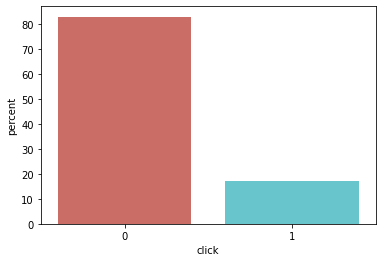

In [68]:
sns.countplot(data=train,x="click",palette='hls',stat="percent")
ax = plt.gca()
# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(plain_formatter))

In [79]:
(train['click'].value_counts()/len(train))*100

0   83
1   17
Name: click, dtype: float64

**Ans --> It's a Highly Imbalanced DataSet with 83% as non-clicked ads and 17% as clicked ads.**

***Q2) On which day most***

1) visit happened.

2) Ads got clicked. 


In [78]:
train.hour.describe()

/var/folders/ph/nnm9q7h11bx4kbkx6gp4k2vc0000gn/T/ipykernel_82626/1630598468.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.hour.describe()


count                10000000
unique                    240
top       2014-10-22 09:00:00
freq                   110767
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

* Now I want that all days, get aggregated. If Day term is same, so they should aggregate. 

In [134]:
train['day_of_week'] = train['hour'].dt.dayofweek
train['day'] = train['hour'].dt.day
train['time'] = train['hour'].dt.hour

In [135]:
train['day_of_week'] = train['day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

/var/folders/ph/nnm9q7h11bx4kbkx6gp4k2vc0000gn/T/ipykernel_82626/2329784079.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train,x='day_of_week',palette='hls')


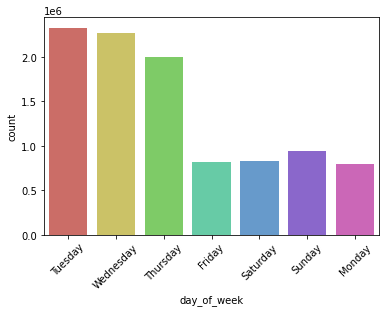

In [327]:
sns.countplot(data=train,x='day_of_week',palette='hls')

#rotate x-axis labels
_,_= plt.xticks(rotation=45)

**Analysis**
* Maximum number of impressions or number of visits are more on Weekdays that too specially on **Tuesday and Wednesday**.

* On weekends the visit are less that's **Friday, Saturday, Sunday and Monday**

In [318]:
x_day_of_week = train.groupby(['day_of_week'],as_index=False)[['click']].value_counts()
x_day_of_week_1 = x_day_of_week[x_day_of_week.click==1].reset_index(drop=True)

In [323]:
x_day_of_week_1['ctr'] = (x_day_of_week_1['count']/train.groupby(['day_of_week'],as_index=False)[['click']].count()['click'])*100
x_day_of_week_1

,day_of_week,click,count,ctr
0,Friday,1,144016,17
1,Monday,1,144642,18
2,Saturday,1,151702,18
3,Sunday,1,172770,18
4,Thursday,1,352178,18
5,Tuesday,1,376641,16
6,Wednesday,1,356475,16


/var/folders/ph/nnm9q7h11bx4kbkx6gp4k2vc0000gn/T/ipykernel_82626/3648855022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x_day_of_week_1,x='day_of_week',y='ctr',palette='hls')


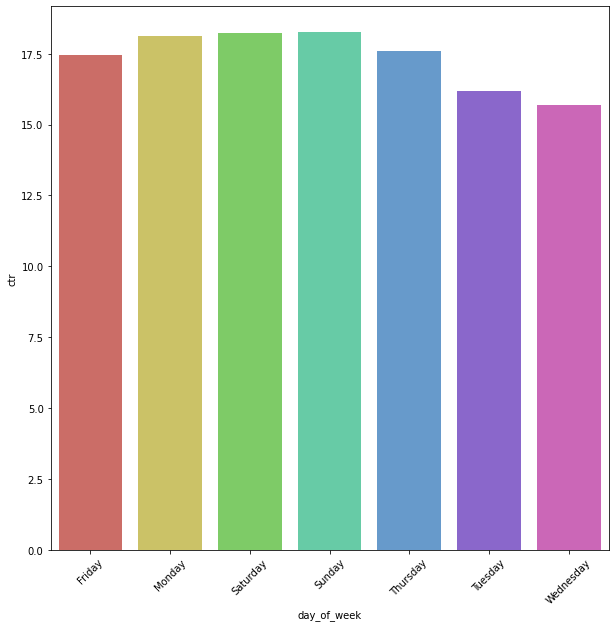

In [324]:
plt.figure(figsize=(10,10))
sns.barplot(data=x_day_of_week_1,x='day_of_week',y='ctr',palette='hls')
_,_ = plt.xticks(rotation=45)

**Analysis**

* Lot of user visit the ads or click on the Ads over weekends. On these days are ad count is low. 
* On Weekdays i.e. Tuesday and Wednesday not lot of people click our Ads

In [239]:
x = train.groupby(['day_of_week'],as_index=False)[['click']].value_counts()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

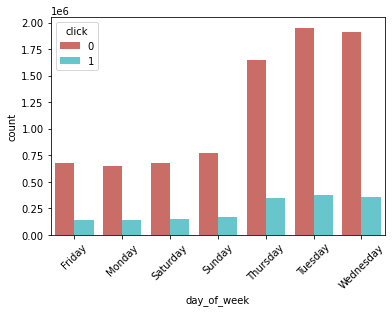

In [251]:
#g = sns.catplot(kind='bar', data=df, x='sex', y='survival_rate', col='class')
sns.barplot(data=x,x='day_of_week',y='count',hue='click',palette='hls')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='time', ylabel='count'>

<Figure size 720x720 with 0 Axes>

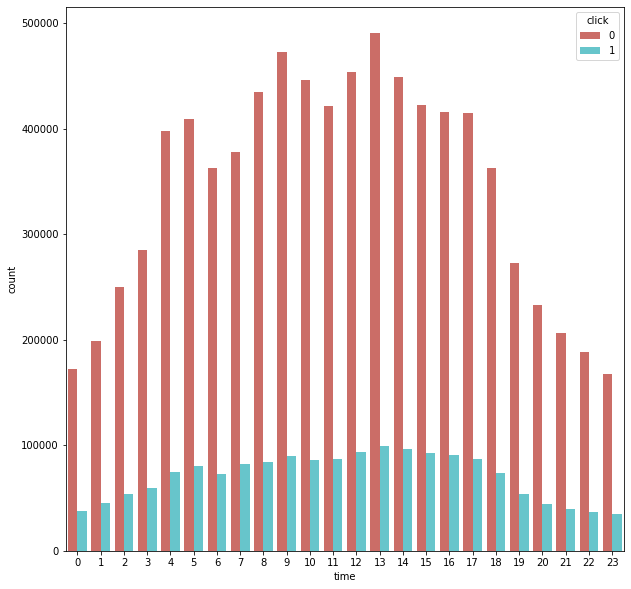

In [325]:
plt.figure(figsize=(10,10))
x = train.groupby(['time'],as_index=False)[['click']].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(data=x,x='time',y='count',hue='click',palette='hls')
#plt.xticks(rotation=90)

/var/folders/ph/nnm9q7h11bx4kbkx6gp4k2vc0000gn/T/ipykernel_82626/3609414562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x[x.click==1].reset_index(drop=True),x='time',y='count',palette='hls')


<AxesSubplot:xlabel='time', ylabel='count'>

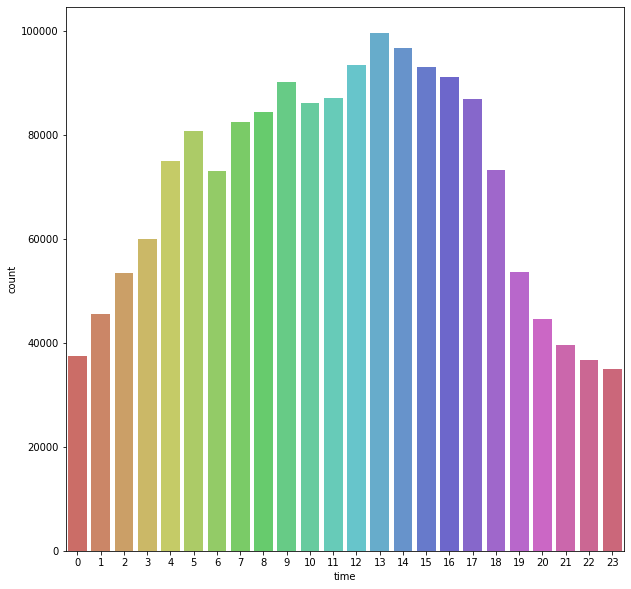

In [266]:
plt.figure(figsize=(10,10))
sns.barplot(data=x[x.click==1].reset_index(drop=True),x='time',y='count',palette='hls')

**Analysis**
* Most of the website visit are during noon time. Around **1 to 5**
* The website visit during night is less.

In [270]:
x_1 = x[x.click==1].reset_index(drop=True)

/var/folders/ph/nnm9q7h11bx4kbkx6gp4k2vc0000gn/T/ipykernel_82626/696528587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x_1,x='time',y='ctr',palette='hls')


<AxesSubplot:xlabel='time', ylabel='ctr'>

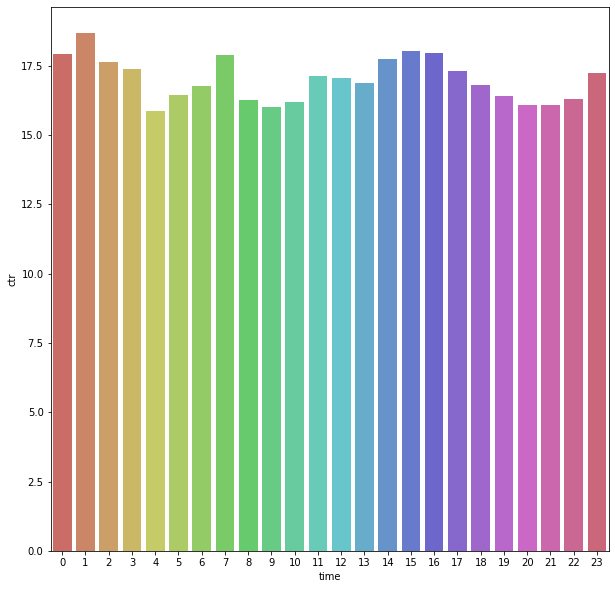

In [306]:
x_1['ctr'] = (x_1['count']*1.0)/(train.groupby(['time'])[['click']].count()['click']*1.0)*100
plt.figure(figsize=(10,10))
sns.barplot(data=x_1,x='time',y='ctr',palette='hls')

**Analysis**
* Although the Ads at night are less, the people visiting or clicking them at night specially at **1** is quiet good.

***Q3) - Let's analyze the banner position and which position is significant for CTR.***

In [329]:
train.banner_pos.value_counts()

0    7198695
1    2783624
7      10676
2       3187
4       1877
5       1453
3        488
Name: banner_pos, dtype: int64

/var/folders/ph/nnm9q7h11bx4kbkx6gp4k2vc0000gn/T/ipykernel_82626/2110100322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train,x='banner_pos',palette='hls')


<AxesSubplot:xlabel='banner_pos', ylabel='count'>

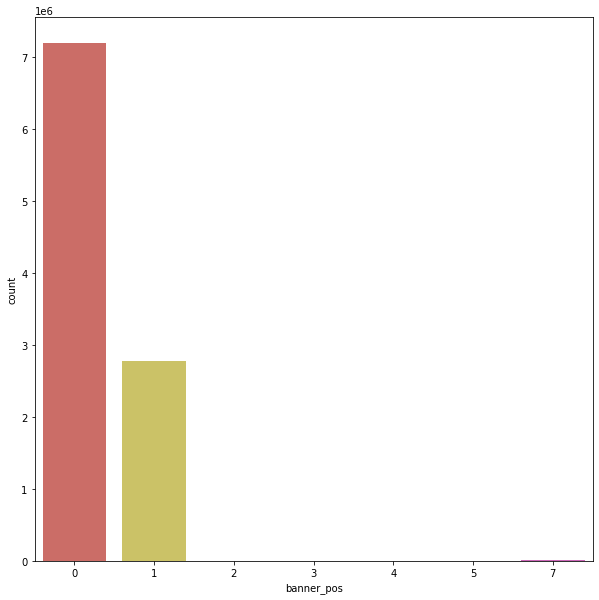

In [331]:
plt.figure(figsize=(10,10))
sns.countplot(data=train,x='banner_pos',palette='hls')

In [332]:
train_1 = train[train.click==1].reset_index(drop=True)

In [339]:
df_banner_pos = train.groupby(['banner_pos'],as_index=False)[['click']].count()

In [341]:
len(df_banner_pos.click)

7

In [346]:
len(df_banner_pos)

7

In [349]:
train_1.groupby('banner_pos',as_index=False)[['click']].count().click

0    1182927
1     511123
2        353
3        107
4        338
5        161
6       3415
Name: click, dtype: int64

In [350]:
df_banner_pos['ctr'] = (train_1.groupby('banner_pos',as_index=False)[['click']].count().click/df_banner_pos.click)*100

/var/folders/ph/nnm9q7h11bx4kbkx6gp4k2vc0000gn/T/ipykernel_82626/1139539056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_banner_pos,x='banner_pos',y='ctr',palette='hls')


<AxesSubplot:xlabel='banner_pos', ylabel='ctr'>

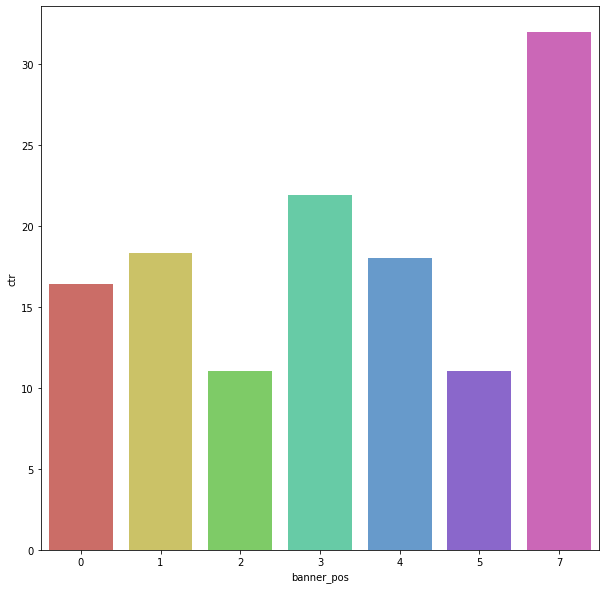

In [352]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_banner_pos,x='banner_pos',y='ctr',palette='hls')

**Analysis**

Although banner position 0 has the highest number of impressions and clicks, banner position 7 enjoys the highest CTR. Increasing the number of ads placed on banner position 7 seems to be a good idea.

***Q4- What role the device model, type plays in Ads?***

In [356]:
train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'day_of_week', 'day',
       'time'],
      dtype='object')

In [357]:
train.device_type.value_counts()

1    9227229
0     549745
4     191131
5      31890
2          5
Name: device_type, dtype: int64

/var/folders/ph/nnm9q7h11bx4kbkx6gp4k2vc0000gn/T/ipykernel_82626/2181498627.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train,x='device_type',palette='hls')


<AxesSubplot:xlabel='device_type', ylabel='count'>

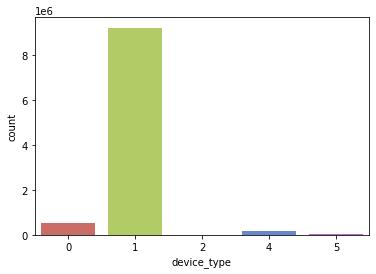

In [358]:
sns.countplot(data=train,x='device_type',palette='hls')

In [394]:
df_device_type = train.groupby(['device_type','click'], as_index=False).size()

In [395]:
df_device_type

,device_type,click,size
0,0,0,433948
1,0,1,115797
2,1,0,7665982
3,1,1,1561247
4,2,0,5
5,4,0,172697
6,4,1,18434
7,5,0,28944
8,5,1,2946


In [402]:
df_banner = train[['device_type','click']].groupby(['device_type']).count().reset_index()

In [403]:
df_click = train[train['click'] == 1]

In [404]:
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['device_type','click']].groupby(['device_type']).count().reset_index()['click']

In [405]:
df_banner

,device_type,impressions,clicks
0,0,549745,115797
1,1,9227229,1561247
2,2,5,18434
3,4,191131,2946
4,5,31890,NaN


In [419]:
train.groupby(['device_type']).agg({'click':'sum'}).reset_index()['click']/train.groupby(['device_type']).agg({'click':'count'}).reset_index()['click']

0   0.2106
1   0.1692
2   0.0000
3   0.0964
4   0.0924
Name: click, dtype: float64

In [412]:
device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = train.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100

In [413]:
merged_device_type

,device_type,click,impressions,CTR
0,0,115797,549745,21.0638
1,1,1561247,9227229,16.9200
2,4,18434,191131,9.6447
3,5,2946,31890,9.2380


<AxesSubplot:xlabel='device_type', ylabel='size'>

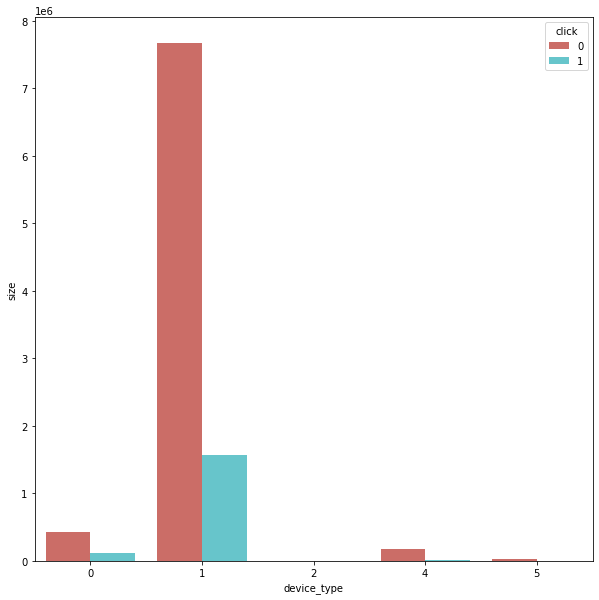

In [376]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_device_type,x='device_type',y='size',hue='click',palette='hls')

In [383]:
df_device_type

,device_type,click,size
0,0,0,433948
1,0,1,115797
2,1,0,7665982
3,1,1,1561247
4,2,0,5
5,4,0,172697
6,4,1,18434
7,5,0,28944
8,5,1,2946


In [380]:
len(train_1.device_model.value_counts())

5519

In [382]:
len(train.site_category.value_counts())

26

Let's create a function that calculate the ctr ratio for different categories and tells me which category has high ctr ratio. It also tells me the top 3 with the highest ctr ratio and the minimum three categories. Number of categories. 


In [427]:
merged_device_type.sort_values(by=['CTR'],ascending=False)[0:3][['device_type','CTR']]

,device_type,CTR
0,0,21.0638
1,1,16.9200
2,4,9.6447


In [445]:
merged_device_type['device_type'].nunique()

4

In [ ]:
merged_device_type.rename(columns={"click":"visits"})

In [486]:
def evaluate(df,col_name):
    clicks = df.groupby(col_name).agg({'click':'sum'}).reset_index()
    visits = df.groupby(col_name).agg({'click':'count'}).reset_index()
    visits['ctr'] = (clicks['click']/visits['click'])*100
    visits["clicked"] = clicks["click"]
    visits.rename(columns={"click":"visits"},inplace=True)
    print(f'###################################')
    print(f'Total number of {col_name} are {visits[col_name].nunique()}')
    print(f'-------------------------------------')
    print(f'The max three ctr are as follows ')
    print(f'{visits.sort_values(by="ctr",ascending=False)[0:3][[col_name,"ctr","visits","clicked"]].to_markdown()}')
    print('--------------------------------------')
    print(f'The bottom three ctr are as follows ')
    print(f'{visits.sort_values(by="ctr",ascending=True)[0:3][[col_name,"ctr","visits","clicked"]].to_markdown()}')
    print(f'##################################')

In [491]:
skip_col = ['id','click','hour']

In [492]:
for col_name in train.columns:
    if col_name not in skip_col:
        evaluate(train,col_name)

###################################
Total number of C1 are 7
-------------------------------------
The max three ctr are as follows 
|    |   C1 |     ctr |           visits |          clicked |
|---:|-----:|--------:|-----------------:|-----------------:|
|  1 | 1002 | 21.0638 | 549745           | 115797           |
|  6 | 1012 | 17.1608 |  28198           |   4839           |
|  2 | 1005 | 16.9363 |      9.18643e+06 |      1.55584e+06 |
--------------------------------------
The bottom three ctr are as follows 
|    |   C1 |     ctr |   visits |   clicked |
|---:|-----:|--------:|---------:|----------:|
|  0 | 1001 | 3.19379 |     2317 |        74 |
|  3 | 1007 | 3.80349 |     8834 |       336 |
|  5 | 1010 | 9.58654 |   223021 |     21380 |
##################################
###################################
Total number of banner_pos are 7
-------------------------------------
The max three ctr are as follows 
|    |   banner_pos |     ctr |          visits |   clicked |
|---:|--

###################################
Total number of device_type are 5
-------------------------------------
The max three ctr are as follows 
|    |   device_type |      ctr |           visits |          clicked |
|---:|--------------:|---------:|-----------------:|-----------------:|
|  0 |             0 | 21.0638  | 549745           | 115797           |
|  1 |             1 | 16.92    |      9.22723e+06 |      1.56125e+06 |
|  3 |             4 |  9.64469 | 191131           |  18434           |
--------------------------------------
The bottom three ctr are as follows 
|    |   device_type |     ctr |   visits |   clicked |
|---:|--------------:|--------:|---------:|----------:|
|  2 |             2 | 0       |        5 |         0 |
|  4 |             5 | 9.23801 |    31890 |      2946 |
|  3 |             4 | 9.64469 |   191131 |     18434 |
##################################
###################################
Total number of device_conn_type are 4
--------------------------------

###################################
Total number of day are 10
-------------------------------------
The max three ctr are as follows 
|    |   day |     ctr |   visits |   clicked |
|---:|------:|--------:|---------:|----------:|
|  5 |    26 | 18.2583 |   946256 |    172770 |
|  4 |    25 | 18.2364 |   831864 |    151702 |
|  2 |    23 | 18.2315 |   959027 |    174845 |
--------------------------------------
The bottom three ctr are as follows 
|    |   day |     ctr |           visits |   clicked |
|---:|------:|--------:|-----------------:|----------:|
|  7 |    28 | 15.213  |      1.30758e+06 |    198923 |
|  8 |    29 | 15.6933 | 948635           |    148872 |
|  1 |    22 | 15.7119 |      1.32131e+06 |    207603 |
##################################
###################################
Total number of time are 24
-------------------------------------
The max three ctr are as follows 
|    |   time |     ctr |   visits |   clicked |
|---:|-------:|--------:|---------:|----------:|
